In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline



(<matplotlib.image.AxesImage at 0x1a6dfeae508>, (-0.5, 540.5, 440.5, -0.5))

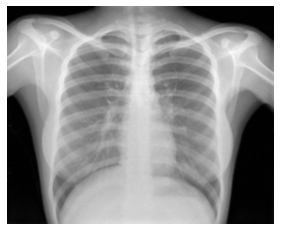

In [112]:
path = "Q1_chest.jpg"
img = cv2.imread(path)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img), plt.axis("off")

(<matplotlib.image.AxesImage at 0x1a6e0f3da88>, (-0.5, 540.5, 440.5, -0.5))

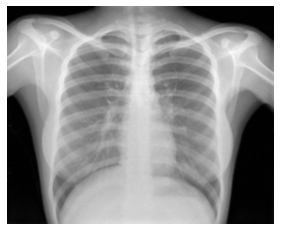

In [114]:
improved_img =  cv2.medianBlur(img,1)#cv2.equalizeHist(img) #cv2.fastNlMeansDenoisingColored(improved_img, None,10,10,1,7)
plt.imshow(improved_img), plt.axis('off')

(<matplotlib.image.AxesImage at 0x1a6e45d7e48>, (-0.5, 540.5, 440.5, -0.5))

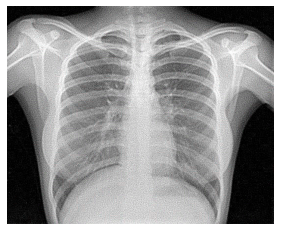

In [145]:
kernel = np.array([[-1, -1, -1], 
                   [-1,9,-1], 
                   [-1, -1, -1]])

# Sharpen image
improved_improved_img = cv2.filter2D(improved_img, -1, kernel)
plt.imshow(improved_improved_img), plt.axis("off")

(<matplotlib.image.AxesImage at 0x1a6e49b5a08>, (-0.5, 540.5, 440.5, -0.5))

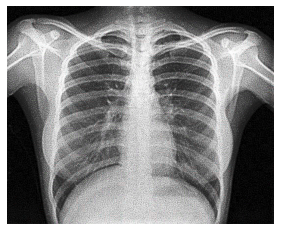

In [148]:
hist,bins=np.histogram(improved_improved_img.flatten(),256,[0,256])
cdf=hist.cumsum()
cdf_m=np.ma.masked_equal(cdf,0)
cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf=np.ma.filled(cdf_m,0).astype('uint8')
img_adj=cdf[improved_improved_img]

plt.imshow(img_adj), plt.axis("off")